In [ ]:
!git clone https://github.com/DrikDrik/sber-movqgan-project

In [ ]:
import sys
sys.path.append('/content/sber-movqgan-project/')

In [ ]:
!pip install pip==24.0
!pip install -r 'sber-movqgan-project/requirements.txt'

In [ ]:
from models.RealNVP.model import RealNVP
from models.RealNVP.train import training_loop
from pipeline.movqgan import decode
from pipeline.show import show_images

In [ ]:
from utils.imports import *

In [ ]:
from pipeline.movqgan import get_model, decode
model = get_model()

In [ ]:
from utils import download_datasets
download_datasets.main()

In [ ]:
!unzip -q datasets/latent_dataset.zip -d '/content/latent_representations/'

In [ ]:
from pipeline.get_latent import LatentDataset

In [ ]:
import os
temp_dataset = LatentDataset('latent_representations')
temp_loader = DataLoader(temp_dataset, batch_size=128, shuffle=True)

In [ ]:
from utils import normalize
normalize_fn = normalize.normalize_fn(temp_loader)
inverse_normalize_fn = normalize.inverse_normalize_fn(temp_loader)

In [ ]:
transform = transforms.Compose([
    transforms.Lambda(normalize_fn)
])
dataset = LatentDataset('latent_representations', transform=transform)
loader = DataLoader(dataset, batch_size=128, shuffle=True)

In [16]:
import gdown

weight_url = "https://drive.google.com/uc?export=download&id=1ZMV4CSGATFh3aydk-N26caHav9IfTkjc"
model_path = "realnvp_model.ckpt"

def download_model_weights(url, output_path='realnvp_model.ckpt'):
    gdown.download(url, output_path, quiet=False)

def load_realnvp_weights_from_ckpt(nvp, weight_path='realnvp_model.ckpt'):
    checkpoint = torch.load(weight_path, map_location='cpu')  # или map_location=device
    nvp.load_state_dict(checkpoint)
    print(f"Веса RealNVP успешно загружены из {weight_path}")


In [ ]:
device='cuda'
nvp = RealNVP().to(device)
nvp.eval()

In [ ]:
download_model_weights(weight_url, model_path)
load_realnvp_weights_from_ckpt(nvp, model_path)

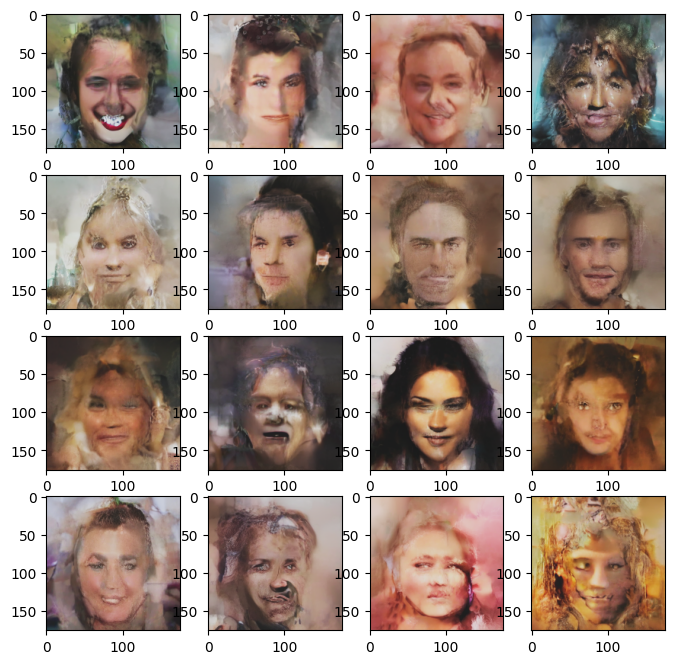

In [41]:
show_images(F.tanh(decode(model, inverse_normalize_fn(nvp.sample(16)))))

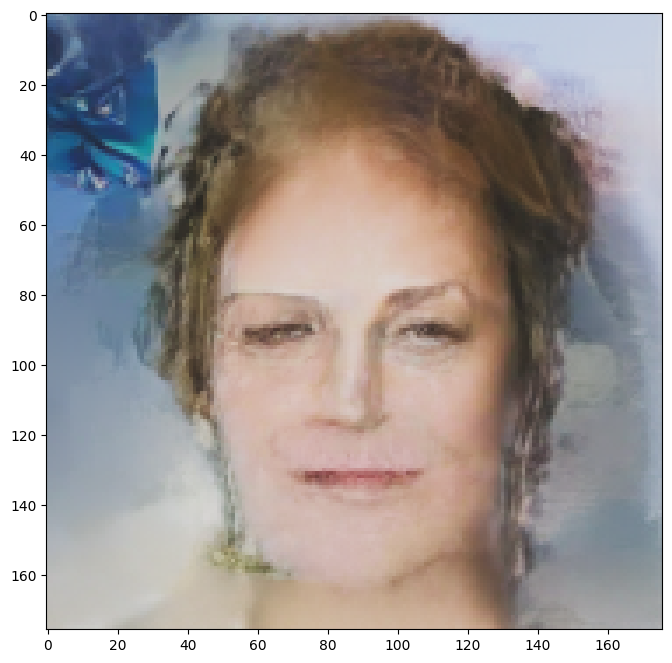

In [56]:
show_images(F.tanh(decode(model, inverse_normalize_fn(nvp.sample(1)))))

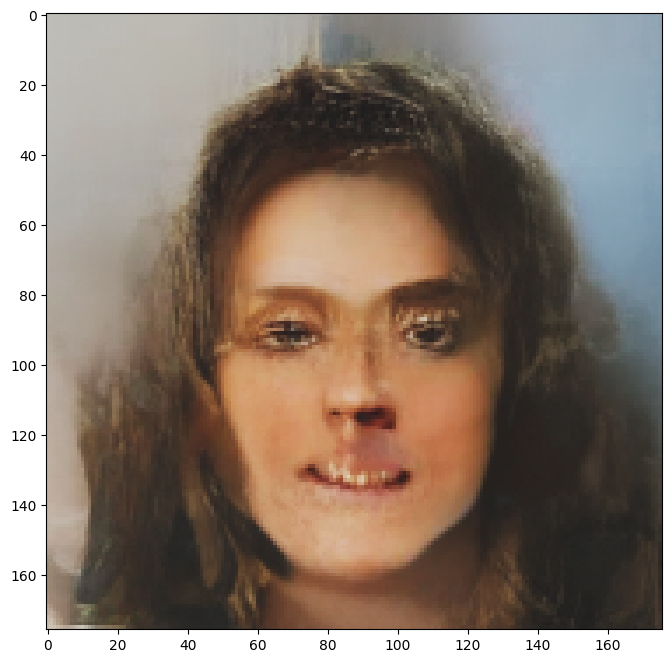

In [128]:
show_images(F.tanh(decode(model, inverse_normalize_fn(nvp.sample(1)))))

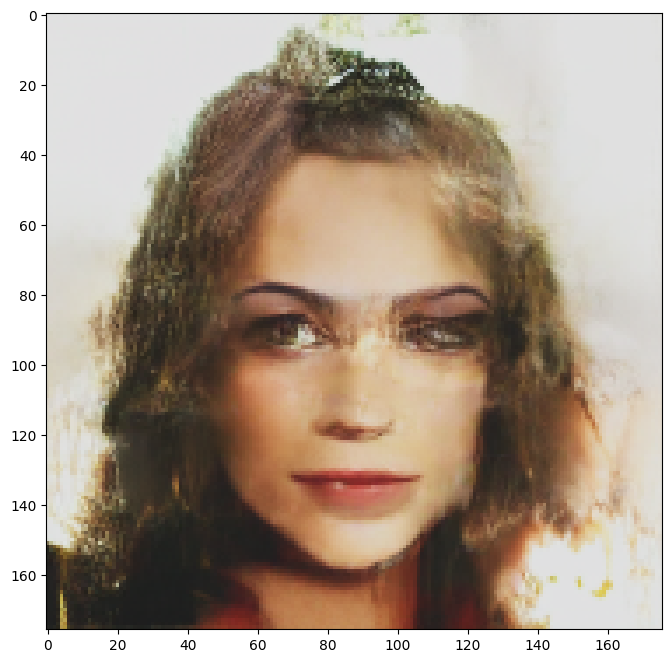

In [146]:
show_images(F.tanh(decode(model, inverse_normalize_fn(nvp.sample(1)))))

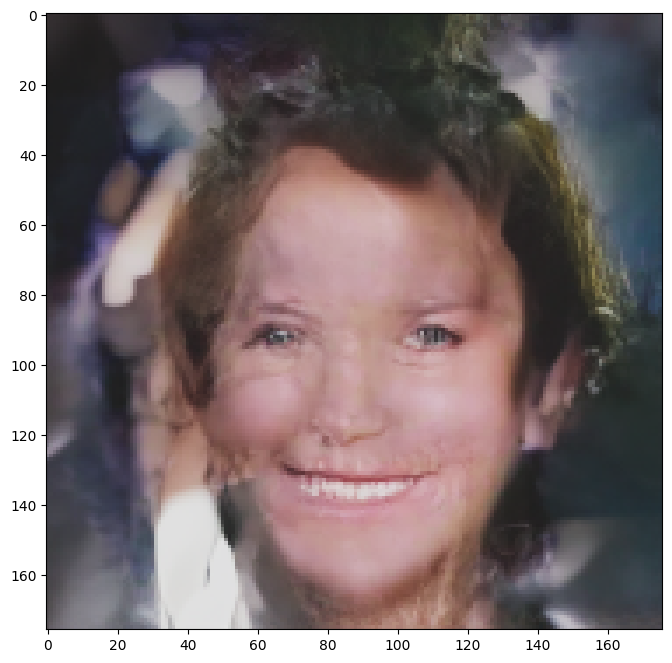

In [169]:
show_images(F.tanh(decode(model, inverse_normalize_fn(nvp.sample(1)))))